In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from matplotlib.gridspec import GridSpec
from sklearn.datasets import load_iris

In [2]:
# df_house = pd.read_csv('/Users/vladislavlipkin/Downloads/melb_data.csv') # MAC OS
df_house = pd.read_csv(r'C:\Users\Incognitus\Downloads\melb_data.csv') # WINDOWS

In [3]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
# —Ä–∞—Å—à–∏—Ñ—Ä–æ–≤–∫–∞ –∑–∞–¥–∞–Ω–Ω—ã—Ö –ø–æ–ª–µ–π –≤ –¥–∞–Ω–Ω—ã—Ö 

# Suburb - –ü—Ä–∏–≥–æ—Ä–æ–¥ (—Ä–∞–π–æ–Ω –≤ –ú–µ–ª—å–±—É—Ä–Ω–µ)
# Address - –ê–¥—Ä–µ—Å –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏
# Rooms - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç
# Type - –¢–∏–ø –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–æ–º, –∫–≤–∞—Ä—Ç–∏—Ä–∞ –∏ —Ç.–ø.)
# Price - –¶–µ–Ω–∞ –ø—Ä–æ–¥–∞–∂–∏
# Method - –ú–µ—Ç–æ–¥ –ø—Ä–æ–¥–∞–∂–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∞—É–∫—Ü–∏–æ–Ω, —á–∞—Å—Ç–Ω–∞—è –ø—Ä–æ–¥–∞–∂–∞)
# SellerG - –ù–∞–∑–≤–∞–Ω–∏–µ –∞–≥–µ–Ω—Ç—Å—Ç–≤–∞-–ø—Ä–æ–¥–∞–≤—Ü–∞
# Date - –î–∞—Ç–∞ –ø—Ä–æ–¥–∞–∂–∏
# Distance - –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –ú–µ–ª—å–±—É—Ä–Ω–∞ (–≤ –∫–º)
# Postcode - –ü–æ—á—Ç–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å
# Bedroom2 - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ø–∞–ª–µ–Ω (–∏–Ω–æ–≥–¥–∞ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å Rooms)
# Bathroom - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∞–Ω–Ω—ã—Ö –∫–æ–º–Ω–∞—Ç
# Car - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∫–æ–≤–æ—á–Ω—ã—Ö –º–µ—Å—Ç
# Landsize - –†–∞–∑–º–µ—Ä —É—á–∞—Å—Ç–∫–∞ (–≤ –º¬≤)
# BuildingArea - –ü–ª–æ—â–∞–¥—å –∑–¥–∞–Ω–∏—è (–≤ –º¬≤)
# YearBuilt - –ì–æ–¥ –ø–æ—Å—Ç—Ä–æ–π–∫–∏
# CouncilArea - –ú—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω—ã–π –æ–∫—Ä—É–≥ / —Ä–∞–π–æ–Ω
# Lattitude - –®–∏—Ä–æ—Ç–∞ (–≥–µ–æ–∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞)
# Longtitude - –î–æ–ª–≥–æ—Ç–∞ (–≥–µ–æ–∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞)
# Regionname - –ù–∞–∑–≤–∞–Ω–∏–µ —Ä–µ–≥–∏–æ–Ω–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, ‚ÄúSouthern Metropolitan‚Äù)
# Propertycount - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –≤ —Ä–∞–π–æ–Ω–µ

In [5]:
df_house.sort_values(by='Price', ascending=False).head(5)

Suburb         Address  Rooms Type      Price Method  \
12094     Mulgrave     35 Bevis St      3    h  9000000.0     PI   
7692    Canterbury  49 Mangarra Rd      5    h  8000000.0     VB   
9575      Hawthorn    49 Lisson Gr      4    h  7650000.0      S   
3616           Kew     15 Barry St      6    h  6500000.0      S   
12557  Middle Park     136 Page St      5    h  6400000.0      S   

            SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
12094          Hall  29/07/2017      18.8    3170.0  ...       1.0  1.0   
7692      Sotheby's  13/05/2017       9.0    3126.0  ...       5.0  4.0   
9575   Abercromby's  17/06/2017       5.3    3122.0  ...       2.0  4.0   
3616         Jellis  13/08/2016       5.6    3101.0  ...       6.0  3.0   
12557      Marshall   9/09/2017       3.0    3206.0  ...       2.0  1.0   

       Landsize  BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
12094     744.0         117.0     1960.0       Monash -37.93168   145.16126   
7692     2079.0         464.3     1880.0   Boroondara -37.81790   145.06940   
9575     1690.0         284.0     1863.0   Boroondara -37.82652   145.03052   
3616     1334.0         365.0     1890.0   Boroondara -37.80290   145.02670   
12557     553.0         308.0     1920.0          NaN -37.84908   144.95753   

                       Regionname Propertycount  
12094  South-Eastern Metropolitan        7113.0  
7692        Southern Metropolitan        3265.0  
9575        Southern Metropolitan       11308.0  
3616        Southern Metropolitan       10331.0  
12557       Southern Metropolitan        2019.0  

[5 rows x 21 columns]

In [6]:
#  –≠—Ç–∞–ø 1. –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö

# –¶–µ–ª—å: –ù–∞—É—á–∏—Ç—å—Å—è ‚Äú—Å–º–æ—Ç—Ä–µ—Ç—å –≤ –¥–∞–Ω–Ω—ã–µ‚Äù, –æ—á–∏—â–∞—Ç—å –∏—Ö –∏ –ø—Ä–∏–≤–æ–¥–∏—Ç—å –≤ –ø—Ä–∏–≥–æ–¥–Ω—É—é –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Ñ–æ—Ä–º—É.

#  –®–∞–≥–∏:
# 	‚Ä¢	–ó–∞–≥—Ä—É–∑–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –ø–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ (df.head()).
# 	‚Ä¢	–ü–æ–ª—É—á–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø—Ä–æ–ø—É—Å–∫–∞—Ö, —Ç–∏–ø–∞—Ö –¥–∞–Ω–Ω—ã—Ö (df.info(), df.isnull().sum()).
# 	‚Ä¢	–ü—Ä–æ–≤–µ—Å—Ç–∏ –±–∞–∑–æ–≤—É—é —á–∏—Å—Ç–∫—É:
# 	‚Ä¢	–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –¥–∞—Ç—É –≤ —Ñ–æ—Ä–º–∞—Ç datetime.
# 	‚Ä¢	–£–¥–∞–ª–∏—Ç—å —Å–∏–ª—å–Ω–æ –¥—É–±–ª–∏—Ä—É—é—â–∏–µ—Å—è/–Ω–µ–Ω—É–∂–Ω—ã–µ –ø–æ–ª—è, –Ω–∞–ø—Ä–∏–º–µ—Ä Address.
# 	‚Ä¢	–û–±—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ ‚Äî –ø–æ–¥—É–º–∞—Ç—å, —á—Ç–æ —Å—Ç–æ–∏—Ç –∑–∞–ø–æ–ª–Ω–∏—Ç—å, –∞ —á—Ç–æ —É–¥–∞–ª–∏—Ç—å.
# 	‚Ä¢	–ü—Ä–∏–≤–µ—Å—Ç–∏ —á–∏—Å–ª–æ–≤—ã–µ –ø–æ–ª—è –∫ –Ω—É–∂–Ω–æ–º—É —Ç–∏–ø—É.

#  –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã: pandas, –±–∞–∑–æ–≤—ã–π matplotlib.pyplot ‚Äî –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –∏ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

In [7]:
# —Å—Ç–æ–ª–±–µ—Ü —Å –¥–∞—Ç–æ–π –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –≤ datetime
df_house['Date'] = pd.to_datetime(df_house['Date'], format='%d/%m/%Y')

In [8]:
# –Ω–∞–π—Ç–∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏
df_house.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
# Car                62
# BuildingArea     6450
# YearBuilt        5375
# CouncilArea      1369

In [10]:
# –∑–∞–ø–æ–ª–Ω–∏—Ç—å –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö
df_house.loc[:, ['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']] = \
    df_house.loc[:, ['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].fillna(0.0)

In [11]:
df_house.head(5)

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0 2016-12-03       2.5    3067.0  ...       1.0  1.0     202.0           0.0   
1 2016-02-04       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2 2017-03-04       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3 2017-03-04       2.5    3067.0  ...       2.0  1.0      94.0           0.0   
4 2016-06-04       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        0.0        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        0.0        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [12]:
#  –≠—Ç–∞–ø 2. –ê–Ω–∞–ª–∏–∑ –±–∞–∑–æ–≤—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫

# –¶–µ–ª—å: –ü–æ–Ω—è—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ä—ã–Ω–∫–∞ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏.

#  –®–∞–≥–∏:
#   1
# 	‚Ä¢	–ü–æ—Å—á–∏—Ç–∞—Ç—å —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É (Price) –ø–æ —Ä–∞–π–æ–Ω–∞–º (Regionname, Suburb)
# 	‚Ä¢	–ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Å—Ç–æ–ª–±—á–∞—Ç—É—é –¥–∏–∞–≥—Ä–∞–º–º—É
#   2
# 	‚Ä¢	–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω—ã (Price) –ø–æ:
# 	‚Ä¢	–∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–æ–º–Ω–∞—Ç (Rooms)
# 	‚Ä¢	—Ç–∏–ø—É –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ (Type)
# 	‚Ä¢	—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é –¥–æ —Ü–µ–Ω—Ç—Ä–∞ (Distance)
#   ‚Ä¢   –ü–æ—Å—Ç—Ä–æ–∏—Ç—å boxplot:
# 	‚Ä¢	–ù–∞–π—Ç–∏ –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã –≤ —Ü–µ–Ω–µ, –ø–ª–æ—â–∞–¥–∏, —Ä–∞–∑–º–µ—Ä–µ —É—á–∞—Å—Ç–∫–∞ ‚Äî —É–±—Ä–∞—Ç—å –∏–ª–∏ –≤—ã–¥–µ–ª–∏—Ç—å.

In [13]:
df_house['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [14]:
# –ü–æ—Å—á–∏—Ç–∞—Ç—å –º–µ–¥–∏–∞–Ω—É –ø–æ –ø–æ–ª—é (Price) —Å–≥—Ä—É–ø–∏—Ä–æ–≤–∞–Ω–Ω—É—é –ø–æ —Ä–∞–π–æ–Ω–∞–º (Regionname, Suburb)

# Regionname - –ù–∞–∑–≤–∞–Ω–∏–µ —Ä–µ–≥–∏–æ–Ω–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, ‚ÄúSouthern Metropolitan‚Äù)
# Suburb - –ü—Ä–∏–≥–æ—Ä–æ–¥

df_avg_price_Regionname_Suburb = (
    df_house.groupby(['Regionname', 'Suburb'])['Price']
    .median()
    .reset_index()
    .rename(columns={'Price': 'avg_price_mln'})
)

df_avg_price = (
    df_house.groupby('Regionname')['Price']
    .median()
    .reset_index()
    .rename(columns={'Price': 'avg_price_mln'})
)

In [15]:
df_avg_price_Regionname_Suburb.sort_values(by='avg_price_mln', ascending=False).head(10)

# –∑–¥–µ—Å—å –º—ã –º–æ–∂–µ–º —É–≤–∏–¥–µ—Ç—å —á—Ç–æ —á–∞—â–µ –≤—Å–µ–≥–æ –º–µ–¥–∏–∞–Ω–Ω–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–ª—å—è –≤—ã—à–µ –≤ —Ä–µ–≥–∏–æ–Ω–µ 'Southern Metropolitan',
# –∏ —Ç–∞–∫ –∂–µ —Å–º–æ—Ç—Ä–µ—Ç—å –∑–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –≤ –ø—Ä–∏–≥–æ—Ä–æ–¥–∞—Ö.

Regionname        Suburb  avg_price_mln
218  Southern Metropolitan       Kooyong      2185000.0
18    Eastern Metropolitan     Eaglemont      1901000.0
179  Southern Metropolitan   Albert Park      1900000.0
194  Southern Metropolitan    Canterbury      1890000.0
222  Southern Metropolitan   Middle Park      1880000.0
184  Southern Metropolitan        Balwyn      1850000.0
190  Southern Metropolitan      Brighton      1773500.0
217  Southern Metropolitan      Kew East      1750000.0
29    Eastern Metropolitan  Ivanhoe East      1740000.0
185  Southern Metropolitan  Balwyn North      1739000.0

In [16]:
# –¥–ª—è —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏ –ø–æ–¥–µ–ª–∏–º –∑–Ω–∞—á–µ–Ω–∏—è 
df_avg_price['avg_price_mln'] = df_avg_price['avg_price_mln'] / 1_000_000

C:\Users\Incognitus\AppData\Local\Temp\ipykernel_5908\3224765358.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x, rotation=45, ha='right', fontsize=10, fontweight='medium', color='#005f73')


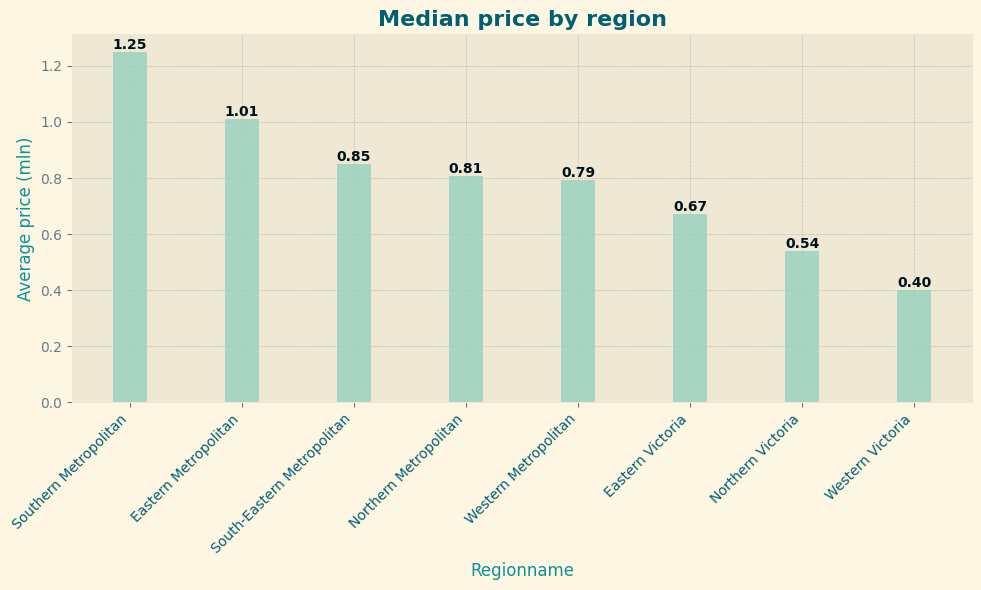

In [17]:
#   1
# 	‚Ä¢	–ü–æ—Å—á–∏—Ç–∞—Ç—å —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É (Price) –ø–æ —Ä–∞–π–æ–Ω–∞–º (Regionname, Suburb)
# 	‚Ä¢	–ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Å—Ç–æ–ª–±—á–∞—Ç—É—é –¥–∏–∞–≥—Ä–∞–º–º—É

# –ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Å—Ç–æ–ª–±—á–∞—Ç—É—é –¥–∏–∞–≥—Ä–∞–º–º—É –∏ –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å –µ–µ –ø–æ —É–±—ã–≤–∞–Ω–∏—é –º–µ–¥–∏–∞–Ω–Ω–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ 'Regionname'

df_avg_price = df_avg_price.sort_values(by='avg_price_mln', ascending=False)

x = df_avg_price['Regionname']
y = df_avg_price['avg_price_mln']

plt.style.use('Solarize_Light2')

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x, y, width=0.3, color='#94d2bd', alpha=0.8)

font_title = {'fontsize': 16, 'fontweight': 'bold', 'color': '#005f73'}
font_labels = {'fontsize': 12, 'fontweight': 'medium', 'color': '#0a9396'}

ax.set_title('Median price by region', **font_title)
ax.set_xlabel('Regionname', **font_labels)
ax.set_ylabel('Average price (mln)', **font_labels)

ax.set_xticklabels(x, rotation=45, ha='right', fontsize=10, fontweight='medium', color='#005f73')

ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

ax.bar_label(bars, fmt='%.2f', fontsize=10, color='#001219', fontweight='bold')

plt.tight_layout()
plt.show()

In [18]:
df_house['Price'] = df_house['Price'] / 1_000_000

In [19]:
#   2
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ Price –ø–æ Rooms  #

In [20]:
# 2.1 Rooms (–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç)

# Boxplot Price –ø–æ Rooms:
# 	‚Ä¢	–ü–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω—ã –≤–Ω—É—Ç—Ä–∏ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –∫–æ–º–Ω–∞—Ç.
# 	‚Ä¢	–¢—ã –≤–∏–¥–∏—à—å:
# 	‚Ä¢	–º–µ–¥–∏–∞–Ω—É (—Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞)
# 	‚Ä¢	–≥—Ä–∞–Ω–∏—Ü—ã ‚Äú–Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö‚Äù —Ü–µ–Ω
# 	‚Ä¢	–≤—ã–±—Ä–æ—Å—ã (–æ—á–µ–Ω—å –¥–æ—Ä–æ–≥–∏–µ –∏–ª–∏ –¥–µ—à—ë–≤—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã)
# 	‚Ä¢	–ü–æ–º–æ–≥–∞–µ—Ç –ø–æ–Ω—è—Ç—å: —Ä–∞—Å—Ç—ë—Ç –ª–∏ —Ü–µ–Ω–∞ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–æ–º–Ω–∞—Ç?

# –ü—Ä–∏–º–µ—Ä –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏:

# –£ –¥–æ–º–æ–≤ —Å 5 –∏ –±–æ–ª–µ–µ –∫–æ–º–Ω–∞—Ç –≤–∏–¥–Ω–æ, —á—Ç–æ —Ü–µ–Ω–∞ —Å–∏–ª—å–Ω–æ –≤—ã—à–µ, –∞ —Ä–∞–∑–±—Ä–æ—Å —Ü–µ–Ω —Ç–æ–∂–µ –±–æ–ª—å—à–æ–π (–±–æ–≥–∞—Ç—ã–µ —Ä–∞–π–æ–Ω—ã).

C:\Users\Incognitus\AppData\Local\Temp\ipykernel_5908\1079183460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


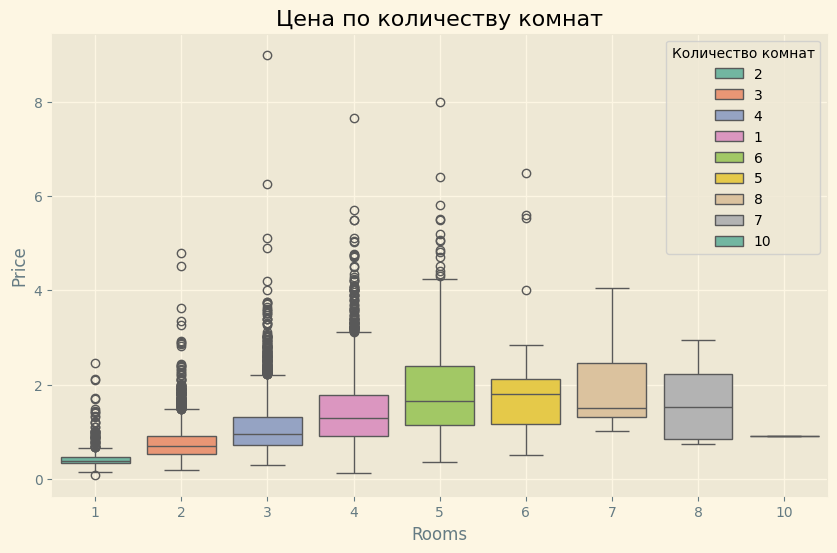

In [21]:
# BOXPLOT
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_house, 
    x='Rooms', 
    y='Price',
    palette='Set2'
)

plt.legend(title='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç', loc='upper right', labels=df_house['Rooms'].unique())
plt.title('–¶–µ–Ω–∞ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–æ–º–Ω–∞—Ç')
plt.grid(True)

plt.ticklabel_format(style='plain', axis='y')  # –û—Ç–∫–ª—é—á–∞–µ–º –Ω–∞—É—á–Ω—É—é –Ω–æ—Ç–∞—Ü–∏—é
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

# –∑–¥–µ—Å–± –º—ã –º–æ–∂–µ–º –≤–∏–¥–µ—Ç—å —á—Ç–æ —Å–∞–º–æ–π –¥–æ—Ä–æ–≥–æ–π –∫–≤–∞—Ä—Ç–∏—Ä–æ–π –æ–∫–∞–∑–∞–ª–∞—Å—å 4 –∫–æ–º–Ω–∞—Ç–Ω–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞
# 

In [22]:
# –≤—ã—á–∏—Å–ª—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø–æ–ª—é Rooms
def count_outliers(group):
    Q1 = group['Price'].quantile(0.25)
    Q3 = group['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    normal = group[(group['Price'] >= lower_bound) & (group['Price'] <= upper_bound)]
    # –í—ã–±—Ä–æ—Å—ã (–∑–∞ –ø—Ä–µ–¥–µ–ª–∞–º–∏ —É—Å–æ–≤)
    outliers = group[(group['Price'] < lower_bound) | (group['Price'] > upper_bound)]
    
    return pd.Series({
        'Normal': len(normal),
        'Outliers': len(outliers)
    })
count_outliers(df_house)

Normal      12968
Outliers      612
dtype: int64

In [23]:
#######   –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ Price –ø–æ Type  #######

In [24]:
#  2.2. Type (–¢–∏–ø –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏)

# Boxplot Price –ø–æ Type:
# 	‚Ä¢	–°—Ä–∞–≤–Ω–∏–≤–∞–µ—Ç —Ü–µ–Ω—É –¥–ª—è —Ä–∞–∑–Ω—ã—Ö —Ç–∏–ø–æ–≤:
# 	‚Ä¢	h ‚Äî house (–¥–æ–º)
# 	‚Ä¢	u ‚Äî unit (–∫–≤–∞—Ä—Ç–∏—Ä–∞)
# 	‚Ä¢	t ‚Äî townhouse (—Ç–∞—É–Ω—Ö–∞—É—Å)
# 	‚Ä¢	–¢—ã –≤–∏–¥–∏—à—å:
# 	‚Ä¢	–£ –∫–∞–∫–æ–≥–æ —Ç–∏–ø–∞ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ —Ü–µ–Ω—ã –≤—ã—à–µ
# 	‚Ä¢	–ö–∞–∫–æ–π —Ç–∏–ø –∏–º–µ–µ—Ç –±–æ–ª—å—à–µ —Ä–∞–∑–±—Ä–æ—Å–∞

C:\Users\Incognitus\AppData\Local\Temp\ipykernel_5908\3132290651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


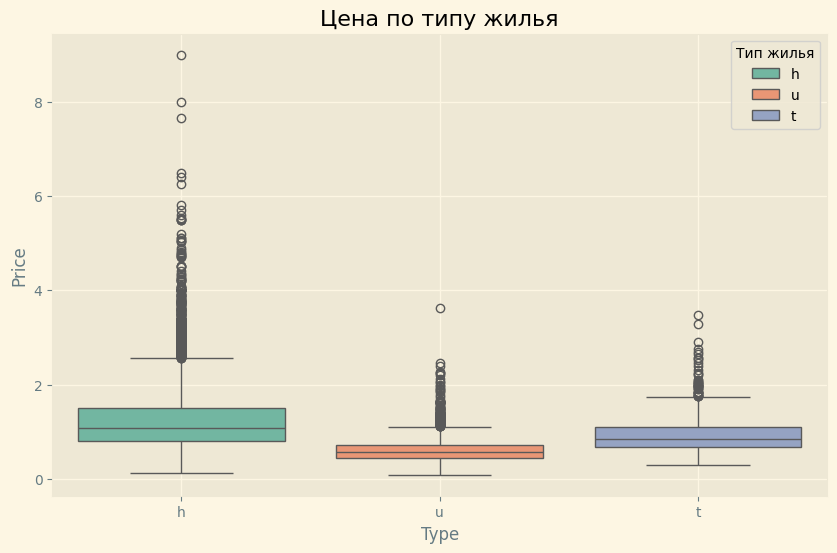

In [25]:
# BOXPLOT
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_house, 
    x='Type', 
    y='Price',
    palette='Set2'
)

plt.legend(title='–¢–∏–ø –∂–∏–ª—å—è', loc='upper right', labels=df_house['Type'].unique())
plt.title('–¶–µ–Ω–∞ –ø–æ —Ç–∏–ø—É –∂–∏–ª—å—è')
plt.grid(True)
plt.show()

In [26]:
# –≤—ã—á–∏—Å–ª—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø–æ–ª—é Type
def count_outliers(group):
    Q1 = group['Price'].quantile(0.25)
    Q3 = group['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    normal = group[(group['Price'] >= lower_bound) & (group['Price'] <= upper_bound)]
    # –í—ã–±—Ä–æ—Å—ã (–∑–∞ –ø—Ä–µ–¥–µ–ª–∞–º–∏ —É—Å–æ–≤)
    outliers = group[(group['Price'] < lower_bound) | (group['Price'] > upper_bound)]
    
    return pd.Series({
        'Normal': len(normal),
        'Outliers': len(outliers)
    })
count_outliers(df_house)

Normal      12968
Outliers      612
dtype: int64

In [27]:
#######   –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ Price –ø–æ Type  #######

In [28]:
# 2.3 Distance (–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞)

# –ó–¥–µ—Å—å –º—ã —Å–Ω–∞—á–∞–ª–∞ —Å–¥–µ–ª–∞–ª–∏ –±–∏–Ω–Ω–∏–Ω–≥ ‚Äî —Ä–∞–∑–±–∏–ª–∏ Distance –Ω–∞ –¥–∏–∞–ø–∞–∑–æ–Ω—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä: 0‚Äì5 –∫–º, 5‚Äì10 –∫–º –∏ —Ç.–¥.)

# Boxplot Price –ø–æ –±–∏–Ω–∞–º Distance:
# 	‚Ä¢	–ü–æ–º–æ–≥–∞–µ—Ç —É–≤–∏–¥–µ—Ç—å: —á–µ–º –¥–∞–ª—å—à–µ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ ‚Äî —Ç–µ–º –¥–µ—à–µ–≤–ª–µ?
# 	‚Ä¢	–ü–æ–∫–∞–∑—ã–≤–∞–µ—Ç –º–µ–¥–∏–∞–Ω–Ω—ã–µ —Ü–µ–Ω—ã –∏ –≤—ã–±—Ä–æ—Å—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –¥–∏–∞–ø–∞–∑–æ–Ω–∞

# üîé –ü—Ä–∏–º–µ—Ä:

# –í —Ü–µ–Ω—Ç—Ä–µ (0‚Äì5 –∫–º) ‚Äî —Å–∞–º—ã–µ –¥–æ—Ä–æ–≥–∏–µ –æ–±—ä–µ–∫—Ç—ã. –ó–∞ –≥–æ—Ä–æ–¥–æ–º ‚Äî –¥–µ—à–µ–≤–ª–µ, –Ω–æ –µ—Å—Ç—å –∏ —ç–ª–∏—Ç–Ω—ã–µ –¥–æ–º–∞-–≤—ã–±—Ä–æ—Å—ã.

In [29]:
df_house['Distance_bin'] = pd.cut(df_house['Distance'], bins=5)

C:\Users\Incognitus\AppData\Local\Temp\ipykernel_5908\3058251728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


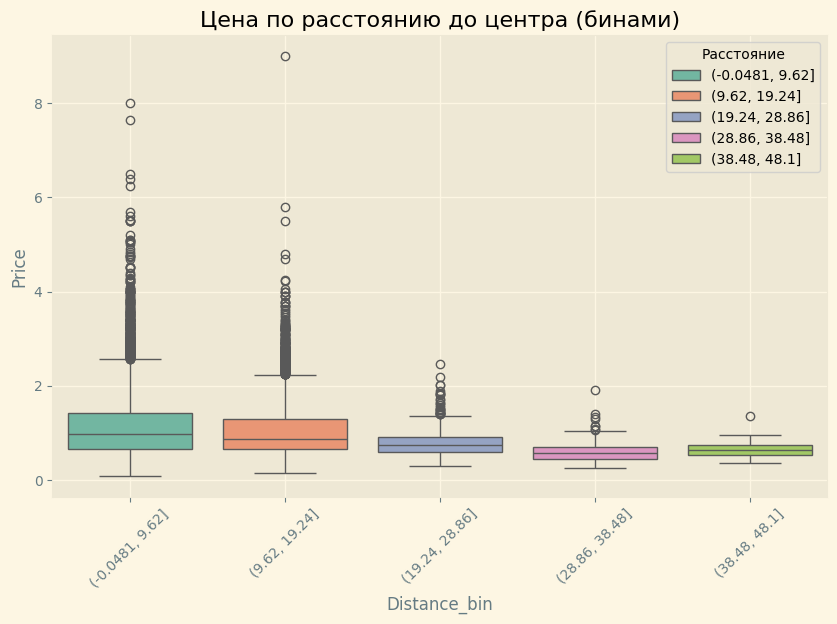

In [30]:
# BOXPLOT
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_house, 
    x='Distance_bin', 
    y='Price',
    palette='Set2'
)

plt.legend(title='–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ', loc='upper right', labels=df_house['Distance_bin'].unique())
plt.title('–¶–µ–Ω–∞ –ø–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é –¥–æ —Ü–µ–Ω—Ç—Ä–∞ (–±–∏–Ω–∞–º–∏)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [31]:
# üìå –≠—Ç–∞–ø 3. –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–µ–π

# –¶–µ–ª—å: –ù–∞–π—Ç–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ —Ü–µ–Ω–æ–π.

# ‚úÖ –®–∞–≥–∏:
# 	‚Ä¢	–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É (df.corr()) ‚Äî –∫–∞–∫ —á–∏—Å–ª–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å–≤—è–∑–∞–Ω—ã —Å —Ü–µ–Ω–æ–π?
# 	‚Ä¢	–í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å heatmap –¥–ª—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏.
# 	‚Ä¢	–ü–æ—Å—Ç—Ä–æ–∏—Ç—å scatterplot –¥–ª—è Price –ø—Ä–æ—Ç–∏–≤:
# 	‚Ä¢	Distance
# 	‚Ä¢	BuildingArea
# 	‚Ä¢	Landsize
# 	‚Ä¢	–ï—Å—Ç—å –ª–∏ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏?

# üìä –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã:
# 	‚Ä¢	seaborn.heatmap, scatterplot, pairplot

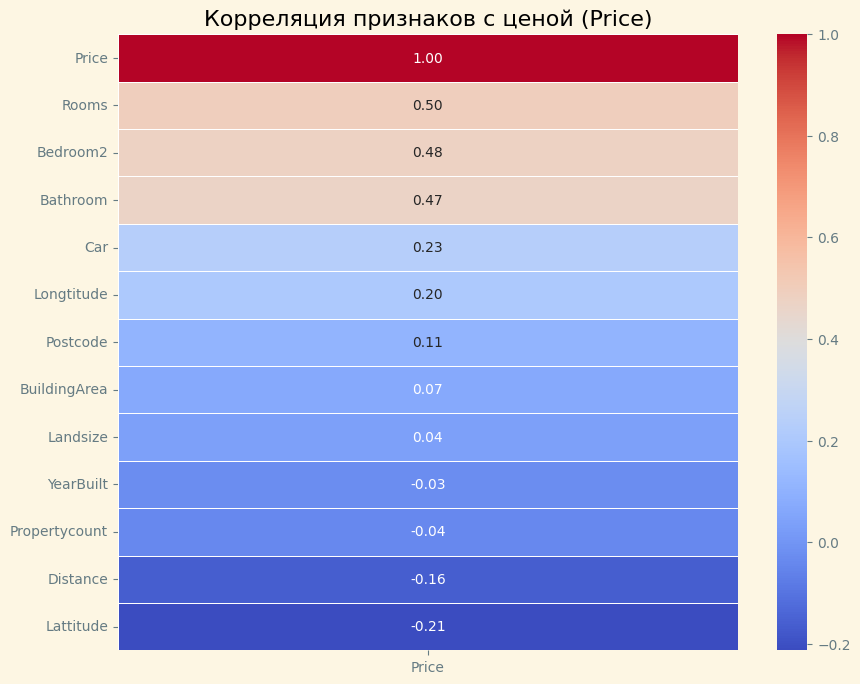

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# –û—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã
numeric_df = df_house.select_dtypes(include='number')

# –°—á–∏—Ç–∞–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é
corr_matrix = numeric_df.corr()

# –°—Ç—Ä–æ–∏–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Price']].sort_values(by='Price', ascending=False), 
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–Ω–æ–π (Price)')
plt.show()

# –º—ã –º–æ–∂–µ–º —É–≤–∏–¥–µ—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç , –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–æ–º–Ω–∞—Ç , —Å–ø–∞–ª–µ–Ω –∏ –≤–∞–Ω–Ω—ã—Ö –∫–æ–º–Ω–∞—Ç 

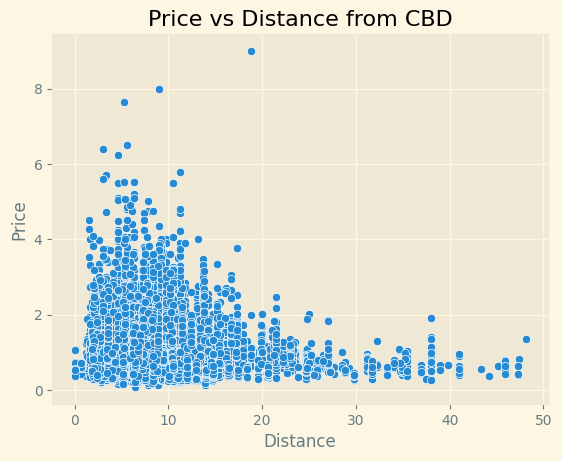

In [33]:
# Scatterplot –¥–ª—è Price vs Distance
sns.scatterplot(data=df_house, x='Distance', y='Price')
plt.title('Price vs Distance from CBD')
plt.show()

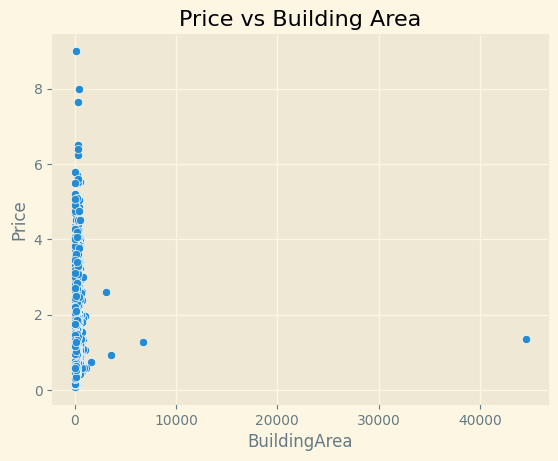

In [34]:
# Scatterplot –¥–ª—è Price vs BuildingArea
sns.scatterplot(data=df_house, x='BuildingArea', y='Price')
plt.title('Price vs Building Area')
plt.show()

In [35]:
df_house.loc[:, ['Suburb', 'Regionname', 'Rooms', 'Type', 'Distance', 'Price', 'BuildingArea', 'Landsize', 'Bedroom2', 'Bathroom']].sort_values(by=['BuildingArea'], ascending=False).head(10)
# –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–≤ –ø–æ BuildingArea –≤–∏–¥–Ω—ã –∞–Ω–æ–º–∞–ª—å–Ω–æ –±–æ–ª—å—à–∏–µ –ø–ª–æ—â–∞–¥–∏ –±–æ–ª–µ–µ 1000 –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –∏ —Ç–∞–∫ –∂–µ –≥–¥–µ —Å–æ–≤—Å–µ–º –Ω–µ —É–∫–∞–∑–∞–Ω–∞ –ø–ª–æ—â–∞–¥—å –ª–∏–±–æ –µ—Å—Ç—å —Å—Ç—Ä–æ–µ–Ω–∏–µ –Ω–æ –Ω–µ—Ç—É –Ω–µ –æ–¥–Ω–æ–π –∫–æ–º–Ω–∞—Ç—ã 
# —Å –ø–æ–º–æ—â—å—é scatterplot –º—ã –º–æ–∂–µ–º –∑–∞–º–µ—Ç–∏—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ –Ω–µ –ø—Ä–∞–≤–∏–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –≤ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –æ–±—å–µ—Ç–∫–∞—Ö , –µ—Å–ª–∏ —Å—É–¥–∏—Ç—å –ø–æ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–º –º–µ—Ç—Ä–∞–º 
# –º–æ–∂–Ω–æ —É–±—Ä–∞—Ç—å —Å—Ç—Ä–æ–∫–∏ –≥–¥–µ –ø–ª–æ—â–∞–¥—å –≤—ã—à–µ 1000 –∏ –Ω–µ –º–µ–Ω—å—à–µ 1 –∫–≤ –º 
# –∞ —Ç–∞–∫ –∂–µ –≥–¥–µ –ø–ª–æ—â–∞–¥—å –∑–µ–º–µ–ª—å–Ω–æ–≥–æ —É—á–∞—Å—Ç–∫–∞ –±–æ–ª—å—à–µ —á–µ–º –ø–ª–æ—â–∞–¥—å –¥–æ–º–∞.

Rooms Type  Distance   Price  BuildingArea  Landsize  Bedroom2  \
13245      5    h      48.1  1.3550    44515.0000   44500.0       5.0   
1484       4    h      11.8  1.2800     6791.0000     732.0       4.0   
2560       2    t       3.5  0.9300     3558.0000    2778.0       2.0   
1588       5    h       7.8  2.6080     3112.0000     730.0       5.0   
2234       2    u       8.5  0.7410     1561.0000       0.0       3.0   
2830       2    t       9.2  0.6000     1143.0000       0.0       2.0   
1368       3    h       5.2  1.0530     1041.0000     343.0       3.0   
3640       5    h       5.6  1.9750     1022.0000     531.0       3.0   
12064      3    h      16.3  0.5805      934.0000     532.0       3.0   
10920      5    h      10.5  3.0000      826.8367     818.0       5.0   

       Bathroom  
13245       3.0  
1484        1.0  
2560        3.0  
1588        2.0  
2234        1.0  
2830        1.0  
1368        1.0  
3640        2.0  
12064       1.0  
10920       3.0

In [46]:
# —Ñ–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –≥–¥–µ –ø–ª–æ—â–∞–¥—å –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã—Ö –º–µ—Ç—Ä–æ–≤ –±–æ–ª—å—à–µ 0 –∏ –Ω–µ –±–æ–ª—å—à–µ 1000, 
#–ø–ª–æ—â–∞–¥—å –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –º–µ–Ω—å—à–µ –ø–ª–æ—â–∞–¥–∏ –∑–µ–º–ª–∏, –∏ –∫–æ–º–Ω–∞—Ç –±–æ–ª—å—à–µ –Ω—É–ª—è –Ω–æ –Ω–µ –±–æ–ª—å—à–µ –ø–ª–æ—â–∞–¥–∏ –∑–¥–∞–Ω–∏—è
BuildingArea_valid = df_house.loc[:, ['Suburb', 'Regionname', 'Rooms', 'Type', 'Distance', 'Price', 'BuildingArea', 'Landsize', 'Bedroom2', 'Bathroom']]\
    .query('BuildingArea < Landsize & 0 < BuildingArea < 1000 & 0 < Rooms < BuildingArea')\
    .sort_values(by=['BuildingArea'], ascending=False)

BuildingArea_valid.sort_values(by='BuildingArea', ascending=True).head(10)

Suburb             Regionname  Rooms Type  Distance   Price  \
8131           Newport   Western Metropolitan      2    h       8.4  0.8900   
11099       Kingsville   Western Metropolitan      3    h       6.4  0.9000   
3306   Heidelberg West   Eastern Metropolitan      3    h       9.4  0.4800   
3688          Kew East  Southern Metropolitan      4    h       7.5  2.4900   
236           Armadale  Southern Metropolitan      3    u       6.3  0.7350   
6123      Surrey Hills  Southern Metropolitan      2    h      11.2  1.0180   
9945         Maidstone   Western Metropolitan      3    t       6.4  0.8100   
4154         Moorabbin  Southern Metropolitan      4    h      14.6  0.9475   
5671       South Yarra  Southern Metropolitan      3    h       3.3  1.8100   
6431          Viewbank   Eastern Metropolitan      4    h      13.8  0.8950   

       BuildingArea  Landsize  Bedroom2  Bathroom  
8131            9.0     165.0       2.0       1.0  
11099          11.0     275.0       3.0       1.0  
3306           13.0     338.0       3.0       1.0  
3688           14.0     712.0       3.0       2.0  
236            14.0    2113.0       3.0       2.0  
6123           15.0     391.0       3.0       1.0  
9945           16.0     209.0       3.0       2.0  
4154           16.0     609.0       4.0       2.0  
5671           18.0     211.0       3.0       1.0  
6431           18.0     700.0       4.0       2.0

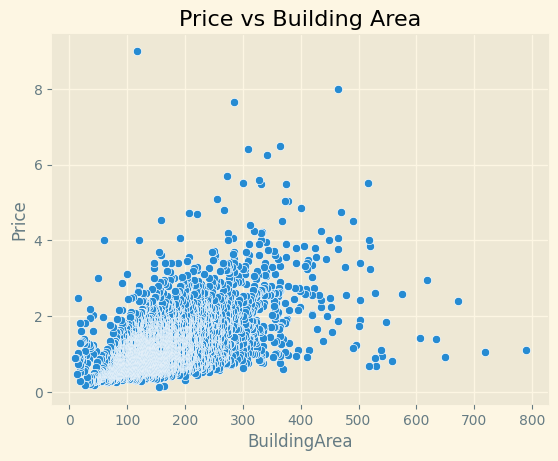

In [37]:
# Scatterplot –¥–ª—è Price vs BuildingArea
sns.scatterplot(data=BuildingArea_valid, x='BuildingArea', y='Price')
plt.title('Price vs Building Area')
plt.show()
# —Ç–µ–ø–µ—Ä—å –≤–∏–¥–Ω–æ 

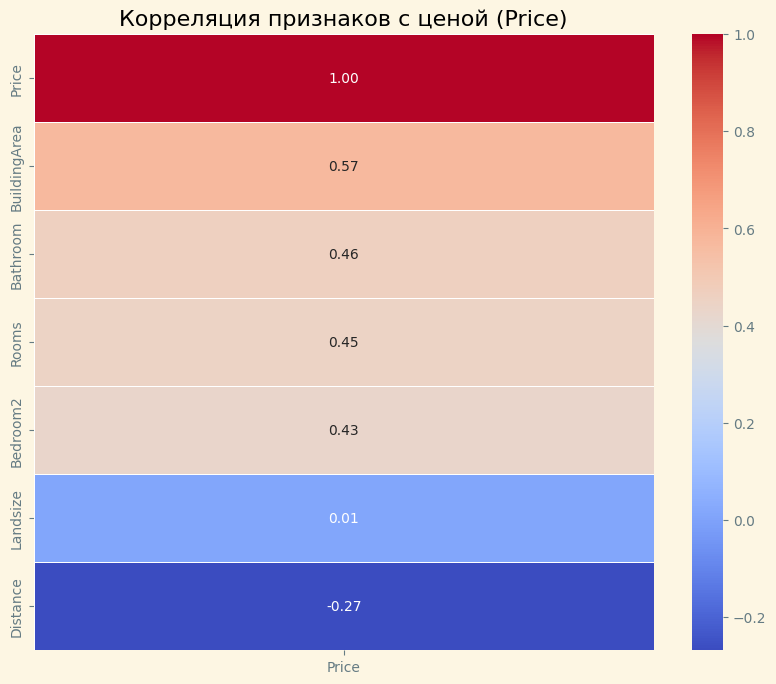

In [45]:
# –∏ –∑–¥–µ—Å—å –º—ã –º–æ–∂–µ–º –≤–µ—Ä–Ω—É—Ç—å—Å—è –∫ 3 –ø—É–Ω–∫—Ç—É , –∏ –ø—Ä–æ–∏–∑–≤–µ—Å—Ç–∏ –µ—â–µ —Ä–∞–∑ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–Ω–æ–π

# –û—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã
numeric_df = BuildingArea_valid.select_dtypes(include='number')

# –°—á–∏—Ç–∞–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é
corr_matrix = numeric_df.corr()

# –°—Ç—Ä–æ–∏–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['Price']].sort_values(by='Price', ascending=False), 
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ü–µ–Ω–æ–π (Price)')
plt.show()

# –∏ –º–æ–∂–µ–º —É–≤–∏–¥–µ—Ç—å —É–∂–µ –¥—Ä—É–≥–æ–π –ø–æ—Ä—è–¥–æ–∫ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏

In [39]:
# üìå –≠—Ç–∞–ø 4. –õ–æ–∫–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

# –¶–µ–ª—å: –£–≥–ª—É–±–∏—Ç—å—Å—è –≤ –∞–Ω–∞–ª–∏–∑ –ø–æ —Ä–∞–π–æ–Ω–∞–º –∏ –≤—ã—è–≤–∏—Ç—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ —Å–µ–≥–º–µ–Ω—Ç—ã.

# ‚úÖ –®–∞–≥–∏:
# 	‚Ä¢	–ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Ç–æ–ø-10 –ø—Ä–∏–≥–æ—Ä–æ–¥–æ–≤ (Suburb) —Å —Å–∞–º–æ–π –≤—ã—Å–æ–∫–æ–π —Å—Ä–µ–¥–Ω–µ–π —Ü–µ–Ω–æ–π.
# 	‚Ä¢	–°—Ä–∞–≤–Ω–∏ —Ç–æ–ø-10 –ø–æ —Ü–µ–Ω–µ –∏ –ø–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é –¥–æ —Ü–µ–Ω—Ç—Ä–∞ ‚Äî –µ—Å—Ç—å –ª–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è?
# 	‚Ä¢	–ù–∞–π–¥–∏ —Å–∞–º—ã–µ ‚Äú–¥–µ—à—ë–≤—ã–µ‚Äù –ø—Ä–∏–≥–æ—Ä–æ–¥—ã, –≥–¥–µ –µ—Å—Ç—å –¥–æ–º–∞ —Å –±–æ–ª—å—à–∏–º —É—á–∞—Å—Ç–∫–æ–º.

# üìä –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã:
# 	‚Ä¢	groupby, sort_values, barplot

In [40]:
### I'M HERE!

In [41]:
# üéØ –ó–ê–î–ê–ù–ò–ï: –ê–Ω–∞–ª–∏–∑ —Ñ–∞–∫—Ç–æ—Ä–æ–≤, –≤–ª–∏—è—é—â–∏—Ö –Ω–∞ —Ü–µ–Ω—É –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –≤ –ú–µ–ª—å–±—É—Ä–Ω–µ

# –¶–µ–ª—å: –û–ø—Ä–µ–¥–µ–ª–∏—Ç—å, –∫–∞–∫–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –∏ –≤–Ω–µ—à–Ω–µ–π —Å—Ä–µ–¥—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞–π–æ–Ω, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞) –Ω–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–Ω—É, –∏ —Å–¥–µ–ª–∞—Ç—å –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é —ç—Ç–∏—Ö –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π.

# ‚∏ª

# üìå –≠—Ç–∞–ø 1. –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö

# –¶–µ–ª—å: –ù–∞—É—á–∏—Ç—å—Å—è ‚Äú—Å–º–æ—Ç—Ä–µ—Ç—å –≤ –¥–∞–Ω–Ω—ã–µ‚Äù, –æ—á–∏—â–∞—Ç—å –∏—Ö –∏ –ø—Ä–∏–≤–æ–¥–∏—Ç—å –≤ –ø—Ä–∏–≥–æ–¥–Ω—É—é –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Ñ–æ—Ä–º—É.

# ‚úÖ –®–∞–≥–∏:
# 	‚Ä¢	–ó–∞–≥—Ä—É–∑–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –ø–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏ (df.head()).
# 	‚Ä¢	–ü–æ–ª—É—á–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –ø—Ä–æ–ø—É—Å–∫–∞—Ö, —Ç–∏–ø–∞—Ö –¥–∞–Ω–Ω—ã—Ö (df.info(), df.isnull().sum()).
# 	‚Ä¢	–ü—Ä–æ–≤–µ—Å—Ç–∏ –±–∞–∑–æ–≤—É—é —á–∏—Å—Ç–∫—É:
# 	‚Ä¢	–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –¥–∞—Ç—É –≤ —Ñ–æ—Ä–º–∞—Ç datetime.
# 	‚Ä¢	–£–¥–∞–ª–∏—Ç—å —Å–∏–ª—å–Ω–æ –¥—É–±–ª–∏—Ä—É—é—â–∏–µ—Å—è/–Ω–µ–Ω—É–∂–Ω—ã–µ –ø–æ–ª—è, –Ω–∞–ø—Ä–∏–º–µ—Ä Address.
# 	‚Ä¢	–û–±—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ ‚Äî –ø–æ–¥—É–º–∞—Ç—å, —á—Ç–æ —Å—Ç–æ–∏—Ç –∑–∞–ø–æ–ª–Ω–∏—Ç—å, –∞ —á—Ç–æ —É–¥–∞–ª–∏—Ç—å.
# 	‚Ä¢	–ü—Ä–∏–≤–µ—Å—Ç–∏ —á–∏—Å–ª–æ–≤—ã–µ –ø–æ–ª—è –∫ –Ω—É–∂–Ω–æ–º—É —Ç–∏–ø—É.

# üìä –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã: pandas, –±–∞–∑–æ–≤—ã–π matplotlib.pyplot ‚Äî –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –∏ –≥—Ä–∞—Ñ–∏–∫–æ–≤ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

# ‚∏ª

# üìå –≠—Ç–∞–ø 2. –ê–Ω–∞–ª–∏–∑ –±–∞–∑–æ–≤—ã—Ö —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫

# –¶–µ–ª—å: –ü–æ–Ω—è—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ä—ã–Ω–∫–∞ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏.

# ‚úÖ –®–∞–≥–∏:
# 	‚Ä¢	–ü–æ—Å—á–∏—Ç–∞—Ç—å —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É (Price) –ø–æ —Ä–∞–π–æ–Ω–∞–º (Regionname, Suburb), –ø–æ —Ç–∏–ø–∞–º –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ (Type) –∏ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–æ–º–Ω–∞—Ç.
# 	‚Ä¢	–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã/boxplot:
# 	‚Ä¢	–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω—ã (Price) –ø–æ:
# 	‚Ä¢	–∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–æ–º–Ω–∞—Ç (Rooms)
# 	‚Ä¢	—Ç–∏–ø—É –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ (Type)
# 	‚Ä¢	—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é –¥–æ —Ü–µ–Ω—Ç—Ä–∞ (Distance)
# 	‚Ä¢	–ù–∞–π—Ç–∏ –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã –≤ —Ü–µ–Ω–µ, –ø–ª–æ—â–∞–¥–∏, —Ä–∞–∑–º–µ—Ä–µ —É—á–∞—Å—Ç–∫–∞ ‚Äî —É–±—Ä–∞—Ç—å –∏–ª–∏ –≤—ã–¥–µ–ª–∏—Ç—å.

# üìä –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã:
# 	‚Ä¢	pandas.groupby
# 	‚Ä¢	seaborn.histplot, boxplot, matplotlib.pyplot

# ‚∏ª

# üìå –≠—Ç–∞–ø 3. –ò—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–µ–π

# –¶–µ–ª—å: –ù–∞–π—Ç–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ –∏ —Ü–µ–Ω–æ–π.

# ‚úÖ –®–∞–≥–∏:
# 	‚Ä¢	–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É (df.corr()) ‚Äî –∫–∞–∫ —á–∏—Å–ª–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å–≤—è–∑–∞–Ω—ã —Å —Ü–µ–Ω–æ–π?
# 	‚Ä¢	–í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å heatmap –¥–ª—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏.
# 	‚Ä¢	–ü–æ—Å—Ç—Ä–æ–∏—Ç—å scatterplot –¥–ª—è Price –ø—Ä–æ—Ç–∏–≤:
# 	‚Ä¢	Distance
# 	‚Ä¢	BuildingArea
# 	‚Ä¢	Landsize
# 	‚Ä¢	–ï—Å—Ç—å –ª–∏ –Ω–µ–ª–∏–Ω–µ–π–Ω—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏?

# üìä –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã:
# 	‚Ä¢	seaborn.heatmap, scatterplot, pairplot

# ‚∏ª

# üìå –≠—Ç–∞–ø 4. –õ–æ–∫–∞–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

# –¶–µ–ª—å: –£–≥–ª—É–±–∏—Ç—å—Å—è –≤ –∞–Ω–∞–ª–∏–∑ –ø–æ —Ä–∞–π–æ–Ω–∞–º –∏ –≤—ã—è–≤–∏—Ç—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ —Å–µ–≥–º–µ–Ω—Ç—ã.

# ‚úÖ –®–∞–≥–∏:
# 	‚Ä¢	–ü–æ—Å—Ç—Ä–æ–∏—Ç—å —Ç–æ–ø-10 –ø—Ä–∏–≥–æ—Ä–æ–¥–æ–≤ (Suburb) —Å —Å–∞–º–æ–π –≤—ã—Å–æ–∫–æ–π —Å—Ä–µ–¥–Ω–µ–π —Ü–µ–Ω–æ–π.
# 	‚Ä¢	–°—Ä–∞–≤–Ω–∏ —Ç–æ–ø-10 –ø–æ —Ü–µ–Ω–µ –∏ –ø–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é –¥–æ —Ü–µ–Ω—Ç—Ä–∞ ‚Äî –µ—Å—Ç—å –ª–∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è?
# 	‚Ä¢	–ù–∞–π–¥–∏ —Å–∞–º—ã–µ ‚Äú–¥–µ—à—ë–≤—ã–µ‚Äù –ø—Ä–∏–≥–æ—Ä–æ–¥—ã, –≥–¥–µ –µ—Å—Ç—å –¥–æ–º–∞ —Å –±–æ–ª—å—à–∏–º —É—á–∞—Å—Ç–∫–æ–º.

# üìä –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã:
# 	‚Ä¢	groupby, sort_values, barplot

# ‚∏ª

# üìå –≠—Ç–∞–ø 5. –§–∏–Ω–∞–ª—å–Ω—ã–µ –∏–Ω—Å–∞–π—Ç—ã –∏ –≥–∏–ø–æ—Ç–µ–∑—ã

# –¶–µ–ª—å: –°—Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∞—Ç—å –≤—ã–≤–æ–¥—ã –∏ –≥–∏–ø–æ—Ç–µ–∑—ã, –∫–∞–∫ –Ω–∞—Å—Ç–æ—è—â–∏–π –∞–Ω–∞–ª–∏—Ç–∏–∫.

# ‚úÖ –®–∞–≥–∏:
# 	‚Ä¢	–ö–∞–∫–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∫–∞–∂—É—Ç—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–º–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ü–µ–Ω—ã?
# 	‚Ä¢	–ö–∞–∫–∏–µ —Ä–∞–π–æ–Ω—ã –º–æ–≥—É—Ç –±—ã—Ç—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã –¥–ª—è –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π/–∏–Ω–≤–µ—Å—Ç–æ—Ä–æ–≤?
# 	‚Ä¢	–ö–∞–∫–∏–µ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ —Ç—ã –º–æ–∂–µ—à—å –¥–∞—Ç—å —Ä–∏—ç–ª—Ç–æ—Ä–∞–º –∏–ª–∏ –±–∏–∑–Ω–µ—Å—É?

# üì¢ –°–¥–µ–ª–∞–π:
# 	‚Ä¢	–ü—Ä–µ–∑–µ–Ω—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —Å–ª–∞–π–¥ —Å 3‚Äì5 –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è–º–∏ –∏ –≤—ã–≤–æ–¥–∞–º–∏.
# 	‚Ä¢	–§–∏–Ω–∞–ª—å–Ω—ã–π notebook –∏–ª–∏ PDF —Å –æ—Ç—á—ë—Ç–æ–º.

# ‚∏ª

# üí° –°–æ–≤–µ—Ç—ã:
# 	‚Ä¢	–î—É–º–∞–π, –∫–∞–∫–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ, –∞ –∫–∞–∫–∏–µ –∑–∞–≤–∏—Å–∏–º—ã–µ.
# 	‚Ä¢	–û–±—Ä–∞—â–∞–π –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –≤—ã–±—Ä–æ—Å—ã ‚Äî –æ–Ω–∏ —Å–∏–ª—å–Ω–æ –º–µ—à–∞—é—Ç –≤ –∞–Ω–∞–ª–∏—Ç–∏–∫–µ.
# 	‚Ä¢	–°—Ä–∞–≤–Ω–∏–≤–∞–π –º–µ–¥–∏–∞–Ω—É –∏ —Å—Ä–µ–¥–Ω–µ–µ ‚Äî –æ—Å–æ–±–µ–Ω–Ω–æ –¥–ª—è —Ü–µ–Ω—ã.

In [42]:
# —Å–ª—É—à–∞–π 
# —á—Ç–æ —Ç–æ –≤—Å–µ —Å—Ç–∞–ª–æ –Ω–µ –ø–æ–Ω—è—Ç–Ω–æ , –Ω–æ —è —Ö–æ—á—É —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è 
# –¥–∞–≤–∞–π —Å —Å–∞–º–æ–≥–æ –Ω–∞—á–∞–ª–∞ –≤–æ—Ç –µ—Å—Ç—å –¢–ó 

# –¶–µ–ª—å: –ü–æ–Ω—è—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ä—ã–Ω–∫–∞ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏.

# 	‚Ä¢	–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã/boxplot:
# 	‚Ä¢	–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω—ã (Price) –ø–æ:
# 	‚Ä¢	–∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–æ–º–Ω–∞—Ç (Rooms)
# 	‚Ä¢	—Ç–∏–ø—É –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ (Type)
# 	‚Ä¢	—Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é –¥–æ —Ü–µ–Ω—Ç—Ä–∞ (Distance)
# 	‚Ä¢	–ù–∞–π—Ç–∏ –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã –≤ —Ü–µ–Ω–µ, –ø–ª–æ—â–∞–¥–∏, —Ä–∞–∑–º–µ—Ä–µ —É—á–∞—Å—Ç–∫–∞ ‚Äî —É–±—Ä–∞—Ç—å –∏–ª–∏ –≤—ã–¥–µ–ª–∏—Ç—å.

# üìä –ò–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç—ã:
# 	‚Ä¢	pandas.groupby
# 	‚Ä¢	seaborn.histplot, boxplot, matplotlib.pyplot

# —Ö–æ—á—É –ø–æ—ç—Ç–∞–ø–Ω–æ –ø—Ä–æ–π—Ç–∏—Å—å 
# –ø–æ–º–æ–≥–∏ –º–Ω–µ 
# –≤–æ—Ç –ø–æ–ª—è —É–∂–µ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ ( –ø—Ä–æ –ø—Ä–æ–ø—É—Å–∫–∏ )
# Suburb - –ü—Ä–∏–≥–æ—Ä–æ–¥ (—Ä–∞–π–æ–Ω –≤ –ú–µ–ª—å–±—É—Ä–Ω–µ)
# Address - –ê–¥—Ä–µ—Å –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏
# Rooms - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç
# Type - –¢–∏–ø –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–æ–º, –∫–≤–∞—Ä—Ç–∏—Ä–∞ –∏ —Ç.–ø.)
# Price - –¶–µ–Ω–∞ –ø—Ä–æ–¥–∞–∂–∏
# Method - –ú–µ—Ç–æ–¥ –ø—Ä–æ–¥–∞–∂–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∞—É–∫—Ü–∏–æ–Ω, —á–∞—Å—Ç–Ω–∞—è –ø—Ä–æ–¥–∞–∂–∞)
# SellerG - –ù–∞–∑–≤–∞–Ω–∏–µ –∞–≥–µ–Ω—Ç—Å—Ç–≤–∞-–ø—Ä–æ–¥–∞–≤—Ü–∞
# Date - –î–∞—Ç–∞ –ø—Ä–æ–¥–∞–∂–∏
# Distance - –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –ú–µ–ª—å–±—É—Ä–Ω–∞ (–≤ –∫–º)
# Postcode - –ü–æ—á—Ç–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å
# Bedroom2 - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ø–∞–ª–µ–Ω (–∏–Ω–æ–≥–¥–∞ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å Rooms)
# Bathroom - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤–∞–Ω–Ω—ã—Ö –∫–æ–º–Ω–∞—Ç
# Car - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∫–æ–≤–æ—á–Ω—ã—Ö –º–µ—Å—Ç
# Landsize - –†–∞–∑–º–µ—Ä —É—á–∞—Å—Ç–∫–∞ (–≤ –º¬≤)
# BuildingArea - –ü–ª–æ—â–∞–¥—å –∑–¥–∞–Ω–∏—è (–≤ –º¬≤)
# YearBuilt - –ì–æ–¥ –ø–æ—Å—Ç—Ä–æ–π–∫–∏
# CouncilArea - –ú—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω—ã–π –æ–∫—Ä—É–≥ / —Ä–∞–π–æ–Ω
# Lattitude - –®–∏—Ä–æ—Ç–∞ (–≥–µ–æ–∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞)
# Longtitude - –î–æ–ª–≥–æ—Ç–∞ (–≥–µ–æ–∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞)
# Regionname - –ù–∞–∑–≤–∞–Ω–∏–µ —Ä–µ–≥–∏–æ–Ω–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, ‚ÄúSouthern Metropolitan‚Äù)
# Propertycount - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –≤ —Ä–∞–π–æ–Ω–µ